In [1]:
import pandas as pd       # For data manipulation
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns     # For enhanced data visualization

from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler       # For scaling features
from sklearn.neighbors import KNeighborsClassifier     # KNN model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


This dataset contains medical information from patients, including vital signs (such as resting blood pressure and cholesterol levels), personal information (age, sex), and indicators of heart health (chest pain type, maximum heart rate, and exercise-induced angina). Each record represents a single patient, along with a label that indicates whether they are more likely or less likely to experience a heart attack. By analyzing these features, we aim to build a model that can help in predicting a patient’s risk of heart disease.

**K-Nearest Neighbors (KNN)** is a straightforward machine learning method used to classify new examples by comparing them to known examples. Here’s how it operates:

Similarity Check: For a new patient, the algorithm looks at existing patients in the dataset to find which ones have the most similar medical measurements.
Grouping: KNN identifies the K “nearest neighbors,” where “nearest” means closest in terms of similarity (e.g., similar cholesterol, blood pressure, etc.).
Majority Rule: It then sees how these K neighbors are labeled—whether they’re high-risk or low-risk—and assigns the majority label to the new patient.
In essence, KNN classifies a new patient based on the outcomes of patients with similar features. This approach is often easy to understand and implement, making it a common starting point for predictive modeling in healthcare.

**Data set explanation:**

**Independent Variables:**

Age : Age of the patient

Sex : Sex of the patient

cp : Chest Pain type chest pain type

Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

exng: exercise induced angina (1 = yes; 0 = no)

oldpeak: Previous peak

slp: Slope

caa: number of major vessels (0-3)

thall: Thal rate

Dependent Variable:

**target / output:**

0 = less chance of heart attack

1= more chance of heart attack

In [2]:
df = pd.read_csv('/content/Heart_Attack_Analysis_&_Prediction_Dataset[1].csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Load dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# Identify missing values
print(df.isnull().sum())


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [6]:
# Define X (features) and y (target)
X = df.drop('output', axis=1)  # Drop the target column from features
y = df['output']               # This is the column we want to predict


In [10]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,     # 20% of data goes to test
    random_state=42,   # Reproducible split
    stratify=y         # Keep class distribution consistent
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (242, 13)
X_test shape: (61, 13)
y_train shape: (242,)
y_test shape: (61,)


In [11]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [50]:
# Make predictions
y_pred = knn.predict(X_test_scaled)


Accuracy: 0.8032786885245902
Confusion Matrix:
 [[19  9]
 [ 3 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



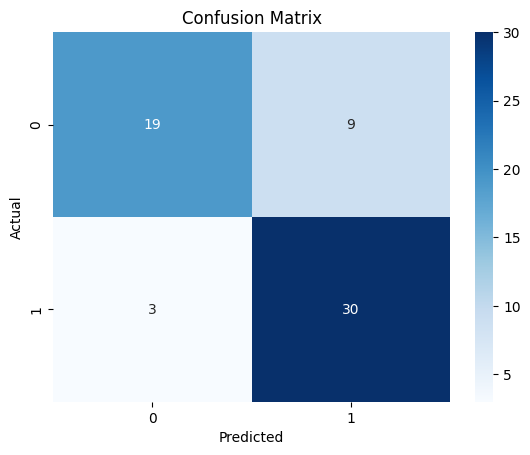

In [51]:
#  Evaluate model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# visualize confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Accuracy** (≈80%):

About 80% of the time, the model correctly predicts whether a patient is at higher or lower risk of heart disease.

**Confusion Matrix (2×2 grid):**

Rows represent the actual class (what the patient’s true status is).
Columns represent the predicted class (what the model guessed).
In this example:
Top-left (19): actual=0 (low risk), predicted=0 → true negatives
Top-right (9): actual=0 (low risk), predicted=1 → false positives
Bottom-left (3): actual=1 (high risk), predicted=0 → false negatives
Bottom-right (30): actual=1 (high risk), predicted=1 → true positives

**Classification Report:**

*Precision* (for a class) measures how many of the model’s predictions for that class were correct.
For “1” (high risk): 0.77 means that out of all the times the model predicted “1,” 77% were truly high risk.

*Recall* (for a class) measures how many of the actual instances of that class the model correctly found.
For “1” (high risk): 0.91 means the model caught 91% of all actual high-risk cases.

*F1-score* is a balance of precision and recall (the higher, the better).